In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_circles
import plotly.graph_objs as go
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

In [49]:

# # Set the seed for reproducibility
# np.random.seed(42)

# Class 1: Mean vector and covariance matrix
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

# Creating DataFrame for Class 1
df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1  # Ensure this line runs correctly

# Class 2: Mean vector and covariance matrix
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

# Creating DataFrame for Class 2
df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0  # Ensure this line runs correctly

# Combining the data
df = pd.concat([df, df1], ignore_index=True)
# Taking a random sample of 40 rows from the combined DataFrame
df = df.sample(40)

In [50]:
df.head()

,feature1,feature2,feature3,target
36,0.718615,-0.664693,0.993801,0
6,-2.037076,1.570032,-0.302324,1
32,-0.730873,2.444339,1.886064,0
35,1.330701,0.985282,1.796405,0
24,2.516233,1.312458,0.686976,0


In [51]:

X_train ,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [52]:
df.head()

,feature1,feature2,feature3,target
36,0.718615,-0.664693,0.993801,0
6,-2.037076,1.570032,-0.302324,1
32,-0.730873,2.444339,1.886064,0
35,1.330701,0.985282,1.796405,0
24,2.516233,1.312458,0.686976,0


In [53]:
## step 1 of performing pca
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [54]:
df.head()

,feature1,feature2,feature3,target
36,0.718615,-0.664693,0.993801,0
6,-2.037076,1.570032,-0.302324,1
32,-0.730873,2.444339,1.886064,0
35,1.330701,0.985282,1.796405,0
24,2.516233,1.312458,0.686976,0


In [55]:

dt=DecisionTreeRegressor()
model=dt.fit(X_train,y_train)

In [56]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=8,shuffle=True)
cv_scores_train = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.71875
1.0


In [57]:
df.head()

,feature1,feature2,feature3,target
36,0.718615,-0.664693,0.993801,0
6,-2.037076,1.570032,-0.302324,1
32,-0.730873,2.444339,1.886064,0
35,1.330701,0.985282,1.796405,0
24,2.516233,1.312458,0.686976,0


In [58]:
import plotly.express as px

# Creating a 3D scatter plot
fig = px.scatter_3d(
    df,
    x=df['feature1'],
    y=df['feature2'],
    z=df['feature3'],
    color=df['target'].astype('str')
)

# Updating the traces in the figure
fig.update_traces(
    marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
    selector=dict(mode='markers')
)

# Displaying the figure
fig.show()


In [59]:
## step 1 of performing pca
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df.iloc[:,0:3]=s.fit_transform(df.iloc[:,0:3])

In [60]:
df.head()

,feature1,feature2,feature3,target
36,0.054043,-1.199389,0.374025,0
6,-2.759979,0.796719,-0.802450,1
32,-1.426127,1.577669,1.183919,0
35,0.679085,0.274406,1.102538,0
24,1.889712,0.566648,0.095524,0


In [61]:
covarience_matrix=np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
covarience_matrix

array([[ 1.02564103,  0.24358467, -0.02690461],
       [ 0.24358467,  1.02564103,  0.25213334],
       [-0.02690461,  0.25213334,  1.02564103]])

In [62]:
eigenvalues,eigenvectors=np.linalg.eig(covarience_matrix)
print(eigenvectors)
print(eigenvalues)

[[ 0.50185848 -0.71933402  0.48030889]
 [-0.69342383 -0.0026776   0.72052496]
 [ 0.51701205  0.69465919  0.50014713]]
[0.6613602  1.05252945 1.36303343]


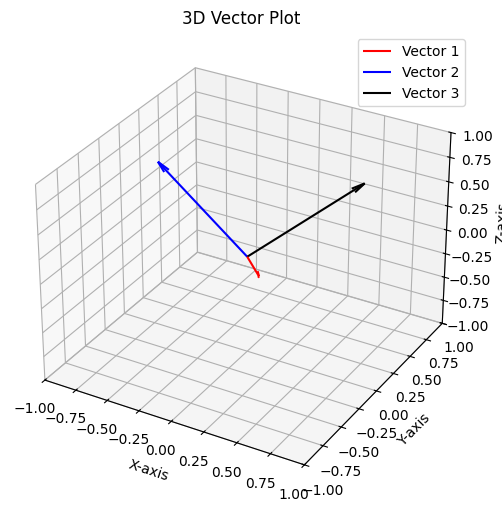

In [63]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define vectors
vector1 = eigenvectors[0,:]
vector2 = eigenvectors[1,:]
vector3=eigenvectors[2,:]
# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot vectors
ax.quiver(0, 0, 0, *vector1, color='r', label='Vector 1', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *vector2, color='b', label='Vector 2', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *vector3, color='black', label='Vector 3', arrow_length_ratio=0.1)
# Set labels
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Vector Plot')

# Show legend
ax.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


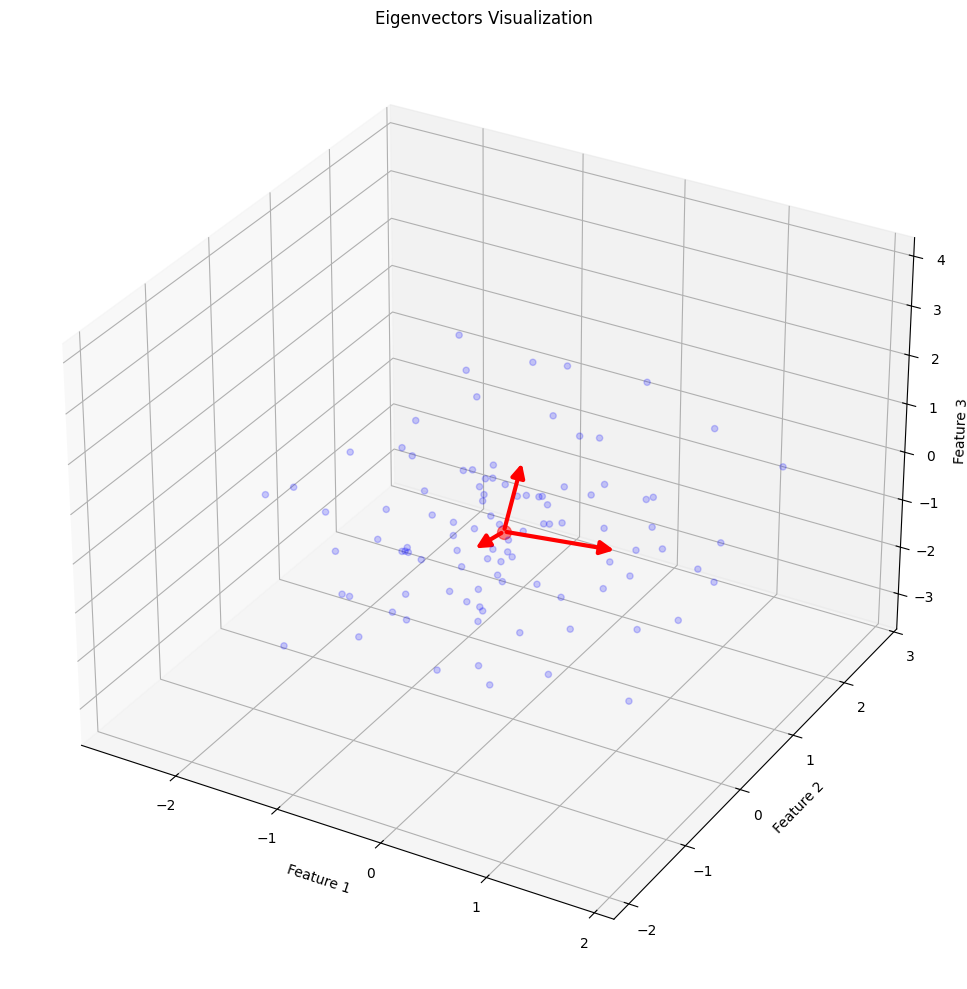

In [66]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        # Use the transformation matrix from the current axes
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.get_proj())
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)

    def do_3d_projection(self):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.get_proj())
        return np.min(zs)

# Generate sample data
np.random.seed(42)
n_samples = 100
df1 = pd.DataFrame({
    'feature1': np.random.normal(0, 1, n_samples),
    'feature2': np.random.normal(0, 1, n_samples),
    'feature3': np.random.normal(0, 1, n_samples)
})

# Compute covariance matrix and its eigenvectors
cov_matrix = df1.cov()
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Create 3D plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(df1['feature1'], df1['feature2'], df1['feature3'], c='blue', alpha=0.2)

# Plot mean point
mean_point = [df1['feature1'].mean(), df1['feature2'].mean(), df1['feature3'].mean()]
ax.scatter([mean_point[0]], [mean_point[1]], [mean_point[2]], c='red', s=100, alpha=0.5)

# Plot eigenvectors
for v in eigen_vectors.T:
    a = Arrow3D(
        [mean_point[0], mean_point[0] + v[0]],
        [mean_point[1], mean_point[1] + v[1]],
        [mean_point[2], mean_point[2] + v[2]],
        mutation_scale=20,
        lw=3,
        arrowstyle="-|>",
        color="r"
    )
    ax.add_artist(a)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.title('Eigenvectors Visualization')
plt.tight_layout()
plt.show()

In [68]:
pc=eigen_vectors[[1,2],:]
pc

array([[ 0.22708789,  0.42490168,  0.87629314],
       [-0.87664653, -0.3027225 ,  0.37396516]])

In [69]:
df.head()

,feature1,feature2,feature3,target
36,0.054043,-1.199389,0.374025,0
6,-2.759979,0.796719,-0.802450,1
32,-1.426127,1.577669,1.183919,0
35,0.679085,0.274406,1.102538,0
24,1.889712,0.566648,0.095524,0


In [70]:
transform_df=np.dot(df.iloc[:,0:3],pc.T)
df_new=pd.DataFrame(transform_df,columns=['pc1','pc1'])
df_new['target']=df['target'].values
df_new.head()

,pc1,pc1,target
0,-0.169594,0.455578,0
1,-0.991412,1.878253,1
2,1.383958,1.215358,0
3,1.236954,-0.266076,0
4,0.753608,-1.792424,0


In [71]:
df1.shape

(100, 3)

In [72]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(df_new.iloc[:,:-1],df_new.iloc[:,-1],test_size=0.2,random_state=2)

In [73]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model=dt.fit(X_train,y_train)
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=8,shuffle=True)
cv_scores_train = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.65625
1.0


#`pca in mnist dataset`

In [114]:
df=pd.read_csv('/content/sample_data/mnist_train_small.csv')
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df.shape

(19999, 785)

In [117]:
X_train ,X_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=2)

In [118]:
X_train.shape

(15999, 784)

In [119]:
X_test.shape

(4000, 784)

In [120]:
import matplotlib.pyplot as plt

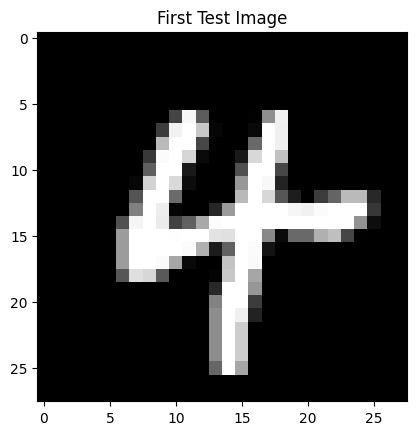

In [121]:
plt.imshow(X_test.iloc[1000,:].values.reshape(28,28), cmap='gray')  # Display the first image
plt.title("First Test Image")
plt.show()


In [122]:
dt=DecisionTreeClassifier()
model=dt.fit(X_train,y_train)

In [158]:
rfc=RandomForestClassifier()
model=rfc.fit(X_train,y_train)

In [218]:
svc=SVC()
model=svc.fit(X_train,y_train)

In [219]:
y_pred=model.predict(X_test)

In [228]:
# ! pip install xgboost

In [230]:
import xgboost
xgb=xgboost.XGBClassifier()
model=xgb.fit(X_train,y_train)

In [232]:
y_pred=model.predict(X_test)

In [233]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.95975


In [161]:
print(accuracy_score(y_test,y_pred))
kf=KFold(n_splits=10,shuffle=True)
cv_scores_train = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.9552473420888056
0.92825


In [234]:
## Ist step of pca
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [268]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.90)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [269]:
X_train_trf.shape

(15999, 213)

In [249]:
# dt=DecisionTreeClassifier()
# model=dt.fit(X_train_trf,y_train)

In [203]:
rfc=RandomForestClassifier()
model=rfc.fit(X_train_trf,y_train)

In [237]:
# svc=SVC()
# model=svc.fit(X_train_trf,y_train)

In [270]:
xgb=xgboost.XGBClassifier()
model=xgb.fit(X_train_trf,y_train)

In [271]:
y_pred=model.predict(X_test_trf)

In [272]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.93675


In [273]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,shuffle=True)
cv_scores_train = cross_val_score(model, X_train_trf, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test_trf, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.9393718339587244
0.898


In [137]:
# for i in range(100,784):
#   pca=PCA(n_components=i)
#   X_train_trf=pca.fit_transform(X_train)
#   X_test_trf=pca.transform(X_test)
#   dt=DecisionTreeClassifier()
#   model=dt.fit(X_train_trf,y_train)
#   y_pred=model.predict(X_test_trf)
#   print(accuracy_score(y_test,y_pred))

##`Visualization of high dim data into 2-3d with pca`

In [190]:
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [191]:
import plotly.express as px
px.scatter(x=X_train_trf[:,0],y=X_train_trf[:,1],color=y_train)

In [208]:
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)
px.scatter_3d(x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],color=y_train.astype('str'))

In [209]:
pca.explained_variance_

array([40.81899644, 29.70737785, 26.950732  ])

In [213]:
pca.components_.shape

(3, 784)

In [261]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05915427, 0.10220575, 0.14126234, 0.1713733 , 0.19744955,
       0.22036893, 0.24063693, 0.25884682, 0.27479223, 0.28925661,
       0.30323381, 0.31604209, 0.32782311, 0.33935575, 0.35005319,
       0.36020165, 0.37014636, 0.37973043, 0.38895823, 0.39789304,
       0.40650936, 0.4149731 , 0.4230462 , 0.43085695, 0.43849374,
       0.44594473, 0.45311131, 0.46012022, 0.46702875, 0.47377791,
       0.48011465, 0.48637501, 0.49262983, 0.49864199, 0.50458858,
       0.51042197, 0.5162065 , 0.52188865, 0.52745074, 0.5328875 ,
       0.53823805, 0.54342684, 0.54842031, 0.5533366 , 0.55818678,
       0.56301163, 0.5676823 , 0.57233519, 0.57688986, 0.58134852,
       0.58572899, 0.59007933, 0.59440157, 0.59858092, 0.60269598,
       0.606721  , 0.61069788, 0.61459485, 0.6184542 , 0.6222032 ,
       0.62589769, 0.6295657 , 0.63320386, 0.63679742, 0.6403595 ,
       0.64388455, 0.64734485, 0.65074681, 0.6541199 , 0.65744346,
       0.6607385 , 0.66400104, 0.66719619, 0.67031695, 0.67341

In [262]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [267]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot using Plotly
fig = px.scatter(
    x=range(1, len(cumulative_variance) + 1),
    y=cumulative_variance,
    labels={'x': "Number of Components", 'y': "Cumulative Explained Variance"},
    title="PCA: Cumulative Explained Variance"
)
fig.show()

In [85]:
df= pd.read_csv('/content/winequalityN - winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [86]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [87]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder=LabelEncoder()
df['type']=encoder.fit_transform(df['type'])

In [88]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [89]:
df.shape

(6497, 13)

In [90]:
df.isna().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [91]:
df=df.dropna()
df.shape

(6463, 13)

In [92]:
df.duplicated().sum()

1168

In [93]:
df=df.drop_duplicates()

In [94]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [95]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [96]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [97]:
rfc=KNeighborsClassifier(n_neighbors=5)
model=rfc.fit(X_train,y_train)

In [98]:
y_pred=model.predict(X_test)

In [99]:
print(accuracy_score(y_test,y_pred))
kf=KFold(n_splits=10,shuffle=True)
cv_scores_train = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.9943342776203966
0.9912652214639367
0.9924438454627135


In [111]:
pca=PCA(n_components=0.95)

In [120]:
pca.n_components_

9

In [118]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [119]:
svc=SVC()
model=svc.fit(X_train_trf,y_train)
y_pred=model.predict(X_test_trf)
print(accuracy_score(y_test,y_pred))
kf=KFold(n_splits=10,shuffle=True)
cv_scores_train = cross_val_score(model,X_train_trf, y_train, cv=kf, scoring='accuracy')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test_trf, y_test, cv=kf, scoring='accuracy')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.9952785646836638
0.9931536866051118
0.9867565139263252


##`Eigen decomposition`

(2, 5)


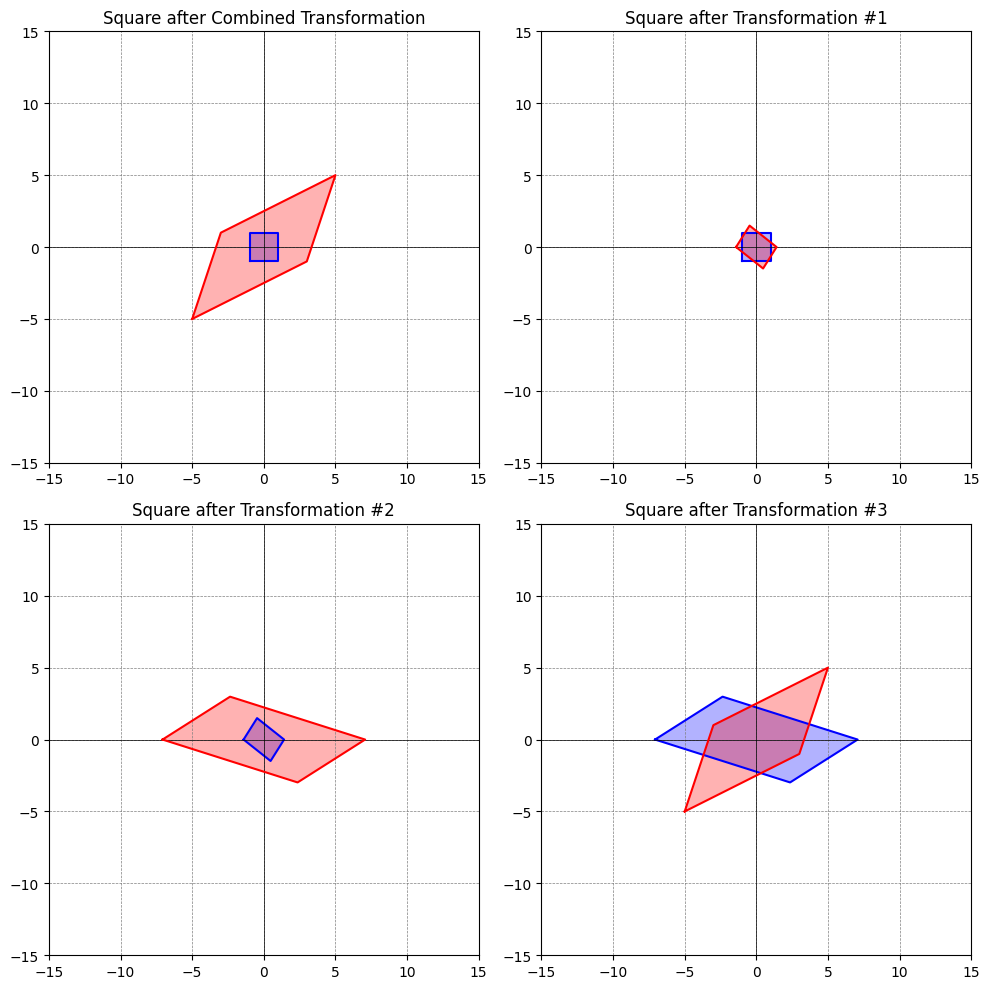

In [126]:
from IPython.display import display, clear_output
# Plot initial coordinate axis and unit square
def plot_square(ax, square):
    ax.plot(square[0, :], square[1, :], 'b')
    ax.fill(square[0, :], square[1, :], 'blue', alpha=0.3)
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

# Apply transformation and plot
def plot_transformed_square(ax, matrix, square):
    transformed_square = np.dot(matrix, square)
    ax.plot(transformed_square[0, :], transformed_square[1, :], 'r')
    ax.fill(transformed_square[0, :], transformed_square[1, :], 'red', alpha=0.3)
    return transformed_square

# Initialize unit square
square = np.array([[-1, -1], [-1, 1], [1, 1], [1, -1], [-1, -1]]).T
print(square.shape)
# Inputs for 3 2x2 matrices
matrix1 = np.array([[ 0.94280904, 0.47140452], [-0.74535599, 0.74535599]])  # Replace with your matrix
matrix2 = np.array([[5, 0], [0, 2]])  # Replace with your matrix
matrix3 = np.array([[ 0.70710678, -0.4472136 ],[ 0.70710678, 0.89442719]])  # Replace with your matrix
matrices = [matrix1, matrix2, matrix3]

# Calculate product of all three matrices
product_matrix = np.dot(matrix3, np.dot(matrix2, matrix1))

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot combined transformation as the first graph
plot_square(axs[0, 0], square)
square_combined = plot_transformed_square(axs[0, 0], product_matrix, square)
axs[0, 0].set_title('Square after Combined Transformation')

# Plot individual transformations as the remaining graphs
for i, (matrix, ax) in enumerate(zip(matrices, axs.flat[1:]), start=1):
    plot_square(ax, square)
    square = plot_transformed_square(ax, matrix, square)
    ax.set_title(f'Square after Transformation #{i}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


#`Kernel pca`

In [235]:
X,y=make_circles(n_samples=1000,noise=0.05,factor=0.3)

In [236]:
import plotly.express as px
px.scatter(x=X[:,0],y=X[:,1],color=y)

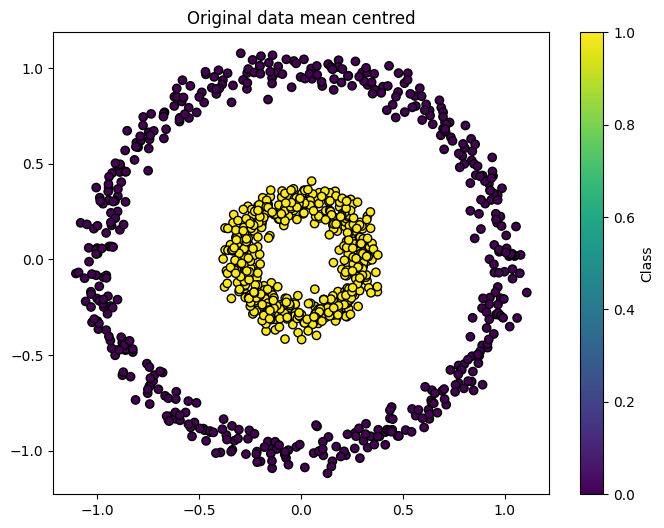

In [237]:

## mean center your dataset
X_centered=X-np.mean(X,axis=0)
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0],X_centered[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Original data mean centred")
plt.colorbar(label="Class")
plt.show()

In [203]:
pca=PCA(n_components=1)
X_pca=pca.fit_transform(X_centered)

In [204]:
X_pca.shape

(1000, 1)

Text(0.5, 1.0, 'Data after PCA in 1D')

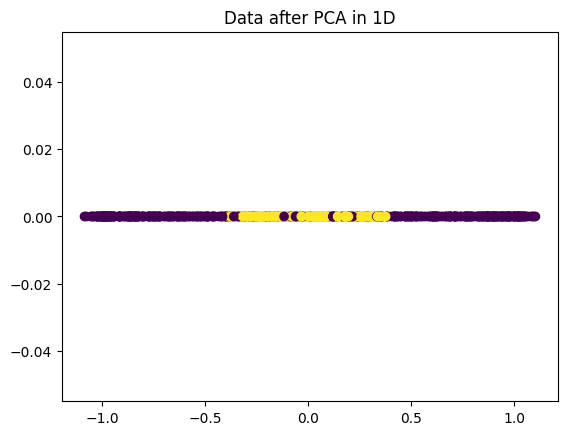

In [205]:
plt.scatter(X_pca,np.zeros((1000,)),c=y)
plt.title('Data after PCA in 1D')

In [206]:
def kernel_rbf(X,y,gamma=0.1):
  distance = np.linalg.norm(X- y) ** 2
  return np.exp(- gamma*distance)

In [207]:
n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = kernel_rbf(X_centered[i], X_centered[j])

In [208]:
K.shape

(1000, 1000)

In [209]:
from scipy.linalg import eigh

In [210]:
eigen_values,eigen_vectors=eigh(K)

In [211]:
k=2
eigen_vectors[:,:2]

array([[-0.03571156, -0.35004095],
       [ 0.78843372,  0.01716564],
       [-0.06244148,  0.1034281 ],
       ...,
       [ 0.016287  , -0.03881477],
       [ 0.03277845,  0.01282346],
       [-0.00586028, -0.00813806]])

In [212]:
X_trans=eigen_vectors[:,:2]

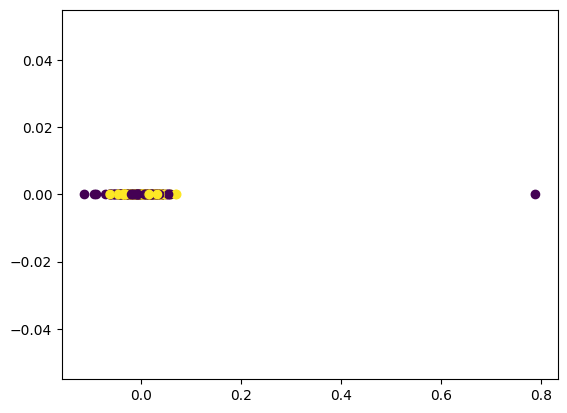

In [214]:
plt.scatter(X_trans[:,0],np.zeros((1000,)),c=y)

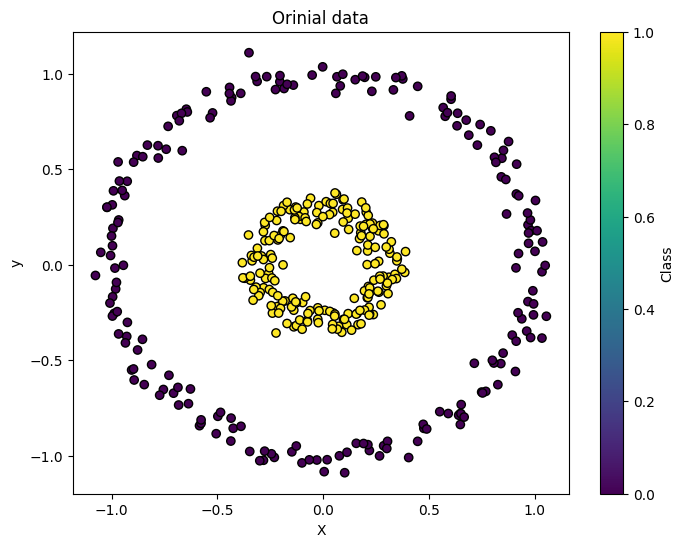

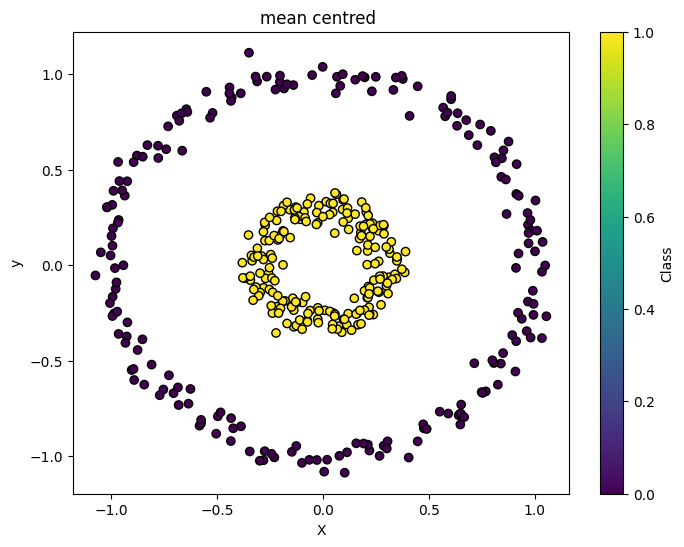

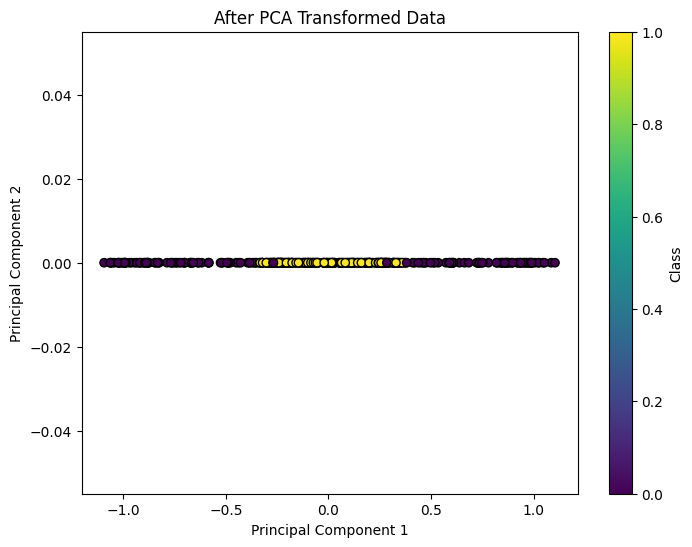

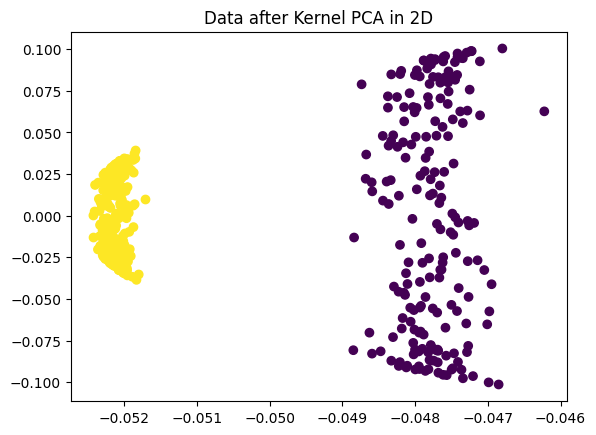

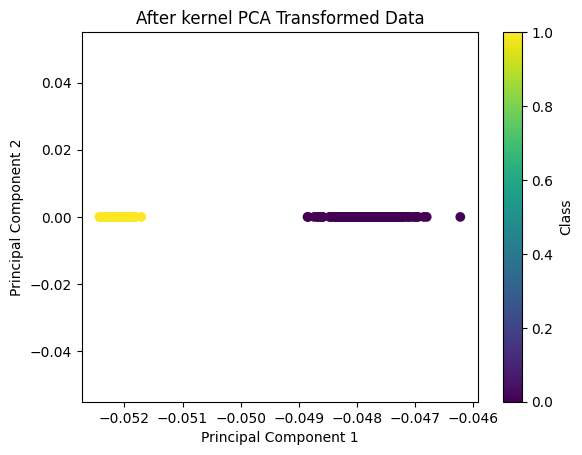

In [220]:
## define dataset
X,y=make_circles(n_samples=400,factor=0.3,noise=0.05)
# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Orinial data")
plt.xlabel("X")
plt.ylabel("y")
plt.colorbar(label="Class")
plt.show()

## mean center your dataset
X_centered=X-np.mean(X,axis=0)
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0],X_centered[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("mean centred ")
plt.xlabel("X")
plt.ylabel("y")
plt.colorbar(label="Class")
plt.show()

pca=PCA(n_components=1)
X_pca=pca.fit_transform(X_centered)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0],np.zeros((400,)), c=y, cmap='viridis', edgecolor='k')
plt.title("After PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class")
plt.show()
## apply transformation
def rbf(x1,x2,gamma=0.1):
  distance=np.linalg.norm(x1-x2)**2
  return np.exp((-gamma) * distance)
n_samples=X.shape[0]
k=np.zeros((n_samples,n_samples))
for i in range(n_samples):
  for j in range(n_samples):
    k[i,j]=rbf(X_centered[i],X_centered[j])

k.shape

from scipy.linalg import eigh
eigen_values,eigen_vectors=eigh(k)
### last one are the largest as per scipy library
eigen_values=eigen_values[::-1]
eigen_vectors=eigen_vectors[:,::-1]

eigen_values.shape

eigen_vectors.shape

X_kpca=eigen_vectors[:,:2]
eigen_vectors.shape
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title('Data after Kernel PCA in 2D')
plt.show()

plt.scatter(X_kpca[:,0],np.zeros((400,)),c=y)
plt.title("After kernel PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class")
plt.show()

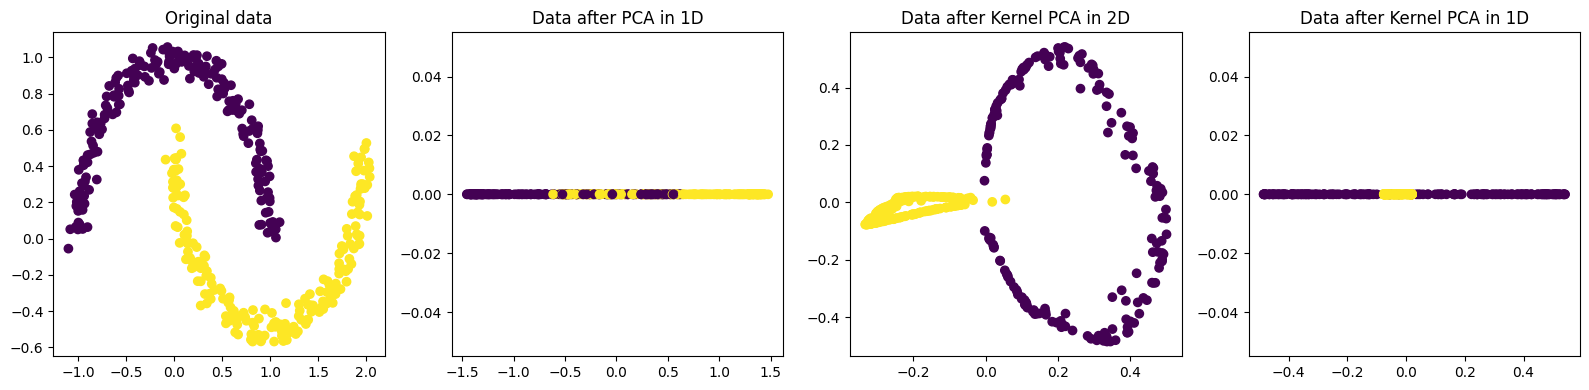

In [223]:
# Generate the dataset
X, y = make_moons(n_samples=400, noise=.05)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Apply Kernel PCA
kpca = KernelPCA(kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X)

# Original data plot
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original data')

# Transformed data with PCA in 1D
plt.subplot(1, 4, 2)
plt.scatter(X_pca[:, 0], np.zeros((400,)), c=y)
plt.title('Data after PCA in 1D')

# Transformed data with Kernel PCA in 2D
plt.subplot(1, 4, 3)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title('Data after Kernel PCA in 2D')

# Transformed data with Kernel PCA in 1D
plt.subplot(1, 4, 4)
plt.scatter(X_kpca[:, 1], np.zeros((400,)), c=y)
plt.title('Data after Kernel PCA in 1D')

plt.tight_layout()
plt.show()

In [222]:


# Create the half moon data
X, y = make_moons(n_samples=500, noise=0.02)

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply the RBF kernel PCA
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X_std)

# Create a trace for the original data
trace1 = go.Scatter(x=X_std[y==0, 0], y=X_std[y==0, 1],
                    mode='markers', name='Class 0',
                    marker=dict(color='red', size=5, opacity=0.5))
trace2 = go.Scatter(x=X_std[y==1, 0], y=X_std[y==1, 1],
                    mode='markers', name='Class 1',
                    marker=dict(color='blue', size=5, opacity=0.5))

# Create a trace for the transformed data
trace3 = go.Scatter3d(x=X_kpca[y==0, 0], y=X_kpca[y==0, 1], z=X_kpca[y==0, 2],
                      mode='markers', name='Class 0',
                      marker=dict(color='red', size=5, opacity=0.5))
trace4 = go.Scatter3d(x=X_kpca[y==1, 0], y=X_kpca[y==1, 1], z=X_kpca[y==1, 2],
                      mode='markers', name='Class 1',
                      marker=dict(color='blue', size=5, opacity=0.5))

# Create the layouts
layout1 = go.Layout(title='Original data in 2D', autosize=True,
                    xaxis=dict(title='Feature 1'),
                    yaxis=dict(title='Feature 2'))
layout2 = go.Layout(title='Data after RBF Kernel PCA in 3D', autosize=True,
                    scene=dict(xaxis=dict(title='PC 1'),
                               yaxis=dict(title='PC 2'),
                               zaxis=dict(title='PC 3')))

# Create the figures and plot
fig1 = go.Figure(data=[trace1, trace2], layout=layout1)
fig2 = go.Figure(data=[trace3, trace4], layout=layout2)

fig1.show()
fig2.show()

##`Kernel pca`

In [248]:
X,y=make_circles(n_samples=400,noise=0.05,factor=0.3)
X_centered=X-np.mean(X,axis=0)

In [249]:
def rbf(x1,x2,gamma=0.1):
  distance=np.linalg.norm(x1-x2)**2
  return np.exp((-gamma) * distance)
n_samples=X.shape[0]
k=np.zeros((n_samples,n_samples))
for i in range(n_samples):
  for j in range(n_samples):
    k[i,j]=rbf(X_centered[i],X_centered[j])

In [250]:
k.shape

(400, 400)

In [251]:
eigen_values,eigen_vectors=eigh(k)

eigen_values=eigen_values[::-1]
eigen_vectors=eigen_vectors[:,::-1]
eigen_vectors.shape

(400, 400)

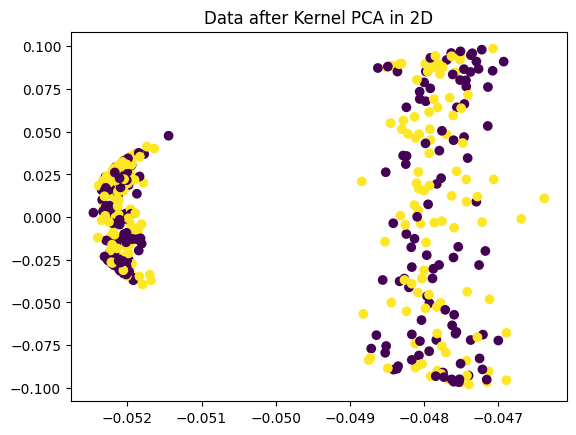

In [252]:
eigen_vectors.shape
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title('Data after Kernel PCA in 2D')
plt.show()

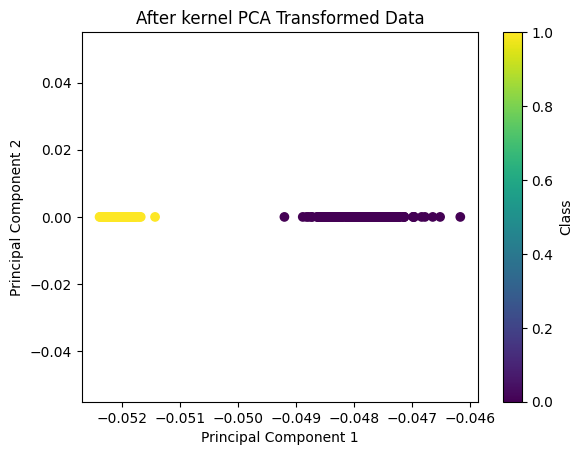

In [253]:
X_kpca=eigen_vectors[:,:2]
plt.scatter(X_kpca[:,0],np.zeros((400,)),c=y)
plt.title("After kernel PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class")
plt.show()

In [6]:
nums = [0,1,2,2,3,0,4,2]
count=0
val=2
for i in range(len(nums)):
  if nums[i]!=nums[val]:
    count+=1
print(count)

5


In [9]:
nums = [1,3,5,6]
target = 5

In [14]:
left,right=0,len(nums)-1
right

3

In [18]:
# Write a function to reverse a list without using the reverse() method.
arr=[1,4,6,3,7,3,7,47,37,3555,76]
arr=arr[::-1]

In [19]:
arr

[76, 3555, 37, 47, 7, 3, 7, 3, 6, 4, 1]

In [35]:
# Find the second largest element in a list.
import numpy as np
arr=[1,4,6,3,7,3,7,1,7,3555,13,13,13]
# sorted(arr)[-2]
def second_largest(arr):
    first = second = float('-inf')  # Initialize with negative infinity
    for num in arr:
        if num > first:  # If current number is greater than first, update first and second
            second = first
            first = num
        elif second < num < first:  # If it's between first and second, update second
            second = num
    return second

In [36]:
second_largest(arr)

13

In [2]:
head = [1, 2, 3, 4, 5]
k = 2
head[-k:]+head[:-k]

[4, 5, 1, 2, 3]